# Introduction to Kepler science lightcurve

### This Notebook will give you the tools to:

$\bullet$ open Kepler science lighcurves

$\bullet$ understand data structure in fits files

$\bullet$ understand basic features of data

$\bullet$ start with fitting your dataset

### What you should achieve:

$\bullet$ plot and inspect data

$\bullet$ identify transits

$\bullet$ make a plan for modelling

### What's next:
after you have completed this notebook:

$\bullet$ perform detailed modelling of your data

$\bullet$ write up the summary of your modelling

$\bullet$ collect your results for the comparison with other datasets

In [1]:
#Necessary imports
from astropy.io import fits #used to open fits files in which data are stored
import pylab #plotting
import glob
mykepler = '1' #add here the source number assigned to you, '1' or '2'

First, we will have a look at the dataset, we have given you the fits dataset exactly as provided by Kepler, you can download additional datasets [on the Kepler archive](https://archive.stsci.edu/kepler/). We have though made the header anonymous so you cannot see which source you are working with. 

In [2]:
#Fits files are open like this:
lc = fits.open('Data/Object%slc/kplr%s_1.fits'%(mykepler, mykepler))

Fits files are common in astrophysics, they have different extensions, which can be images or tables. The information discribing the data is stored in the header.

In [3]:
#The header for the first extension can be accesses like this:
lc[0].header
#It contains basic information about the object (some of those removed here)

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-09'         / file creation date.                            
CREATOR = '826630 FluxExporter2PipelineModule' / pipeline job and program used t
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.22 r60269' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

**You will see some of the header keywords to read 'None of your business', this is because we have anonymized the dataset for you. 

In [4]:
#the data in the extension can be stored like this:
lc[0].data
#the first extension is empty, it just has the information


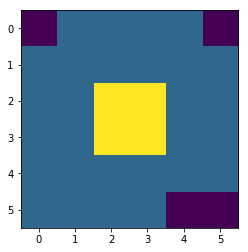

In [5]:
#The last extension holds a small image of the source:
lc[2].header
pylab.imshow(lc[2].data)

In [6]:
#lets have a look at the second extension
lc[1]
#This is a table extension

In [7]:
#Here the beginning has a description of columns in the table, including the units
lc[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 4370 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

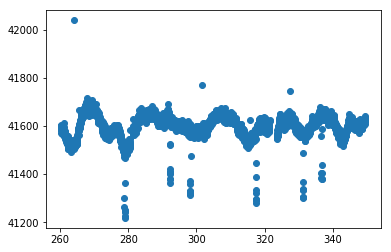

In [8]:
#Lets plot the lightcurve, you can plot the time and flux:
pylab.plot(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], ls='None', marker='o')
#This plots the barycentre time and flux in e/s


## Note: do not panic (or maybe do), this is only a small subset of the data you will be working with

(41500, 41700)

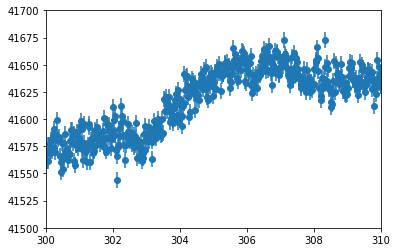

In [9]:
#Measurements errors are also included, you can plot them as follows
pylab.errorbar(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], lc[1].data['PDCSAP_FLUX_ERR'], ls='None', marker='o')
#We'll need to zoom in to see them:
pylab.xlim(300, 310)
pylab.ylim(41500, 41700)

## Your turn: First look at data - signal-to-noise

$\bullet$ calculate the signal to noise of your lightcurve. Compare it to your requested signal-to-noise. Compare it to your ground based measurements

$\bullet$ make notes about your lightcurve: you will be fitting this for planets, do you see any complications?

## Your turn: First look at data - What does your lightcurve look like?

$\bullet$ make notes about your lightcurve: you will be fitting this for planets, do you see any complications?

## Your turn: Preparing for fitting:

$\bullet$ locate all transits and make a plot for each

In [10]:
## So far, we have only looked at a subset of the data, the full dataset is stored in the Data folder.
glob.glob('Data/Object%slc/kplr*.fits'%(mykepler)) #Lists all your lightcurve files


['Data/Object1lc/kplr1_4.fits',
 'Data/Object1lc/kplr1_14.fits',
 'Data/Object1lc/kplr1_7.fits',
 'Data/Object1lc/kplr1_11.fits',
 'Data/Object1lc/kplr1_1.fits',
 'Data/Object1lc/kplr1_3.fits',
 'Data/Object1lc/kplr1_5.fits',
 'Data/Object1lc/kplr1_2.fits',
 'Data/Object1lc/kplr1_17.fits',
 'Data/Object1lc/kplr1_16.fits',
 'Data/Object1lc/kplr1_8.fits',
 'Data/Object1lc/kplr1_6.fits',
 'Data/Object1lc/kplr1_12.fits',
 'Data/Object1lc/kplr1_13.fits',
 'Data/Object1lc/kplr1_10.fits',
 'Data/Object1lc/kplr1_9.fits',
 'Data/Object1lc/kplr1_15.fits']

## Your turn: plot the full lightcurve

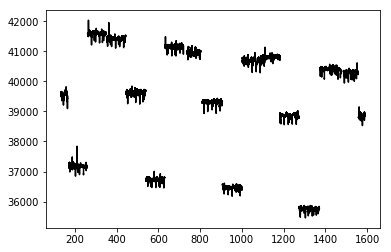

In [11]:
#THis works....
for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    tmp = fits.open(lcfile)
    tmptime = (tmp[1].data['TIME'])
    tmpflux = (tmp[1].data['PDCSAP_FLUX'])
    tmperror = (tmp[1].data['PDCSAP_FLUX_ERR'])
    pylab.plot(tmptime, tmpflux, c='k')

## Your turn: Planning for modelling - Make a plan

$\bullet$ Make a plan for modelling your lightcurve

$\bullet$ Which steps will you need to take? In what order? What tools will you need?

$\bullet$ It might be good to combine all your data into a single file.

## Summary:

After completing this notebook, you should have:

- identified and inspected some individual transits
- made a plan for modelling your data